Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6275 - loss: 0.6194 - val_accuracy: 0.8360 - val_loss: 0.3808
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8762 - loss: 0.3049 - val_accuracy: 0.8734 - val_loss: 0.3136
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9276 - loss: 0.2032 - val_accuracy: 0.8652 - val_loss: 0.3123
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9499 - loss: 0.1539 - val_accuracy: 0.8660 - val_loss: 0.3439
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9585 - loss: 0.1205 - val_accuracy: 0.8654 - val_loss: 0.3840
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9664 - loss: 0.0981 - val_accuracy: 0.8574 - val_loss: 0.4727
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9738 - loss: 0.0758 - val_accuracy: 0.8640 - val_loss: 0.4560
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9849 - loss: 0.0496 - val_accu

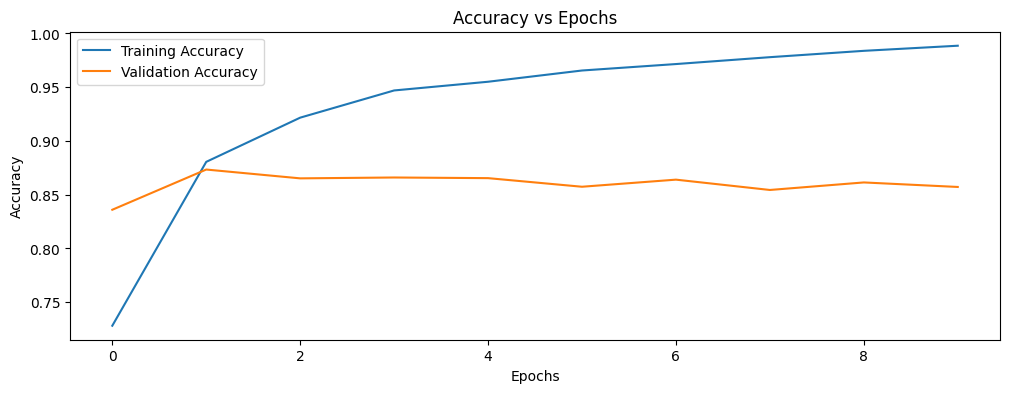

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

vocab_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

max_length = 200
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

plt.figure(figsize=(12,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()

plt.show()